<a href="https://colab.research.google.com/github/plthomps/CIS-3902-Data-Mining/blob/main/Titanic_Seaborn_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Decision Tree (Using Seaborn Dataset)
This notebook demonstrates how to build and interpret a decision tree using the **Seaborn Titanic dataset**.

A few extra lessons are included. Use this notebook as the example for the exercise which follows, where you will build a decision tree classifer on a new dataset.

---
## What you will learn
- How to load a dataset with Seaborn
- How to prepare categorical and numeric features
- How to use one‑hot encoding for categorical variables
- How to train and evaluate a decision tree
- How to read and interpret tree splits
- How to generate readable IF‑THEN rules


## 1️⃣ Import libraries

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## 2️⃣ Load Titanic dataset from Seaborn


**Target variable:** `survived`

In [3]:

df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3️⃣ Select features
We choose features based on domain knowledge that are commonly used.

- categorical: sex, embarked
- numeric: age, fare, sibsp
- target: survived

In [4]:

cols = ["survived","pclass","sex","age","sibsp","fare","embarked"]
df = df[cols]
df.head()


,survived,pclass,sex,age,sibsp,fare,embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


## 4️⃣ Handle missing values
Decision trees require complete data, remember to handle missing values using standard and acceptable methods, based on domain and practice. We will occasionally use methods (like filling in with the mean) that may not be recommended in practice, in order to facilitate the examples for class.

- Fill missing age with median
- Fill missing embarked values

In [5]:

df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna("Unknown")

df.isna().sum()


,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
fare,0
embarked,0


## 5️⃣ Split into features (X) and target (y)

In [6]:

X = df.drop(columns=["survived"])
y = df["survived"]


## 6️⃣ One‑hot encode categorical variables
This converts categories into 0/1 indicator columns.

Using `prefix_sep=' = '` makes tree splits easier to read.

Trees can work with categorical variables, but scikit learn requires one hot encoding (more than one category) or label encoding (for two categories like true-false or for categories that have order like small - medium - large). When in doubt use one hot encoding (dummies).

### How to read splits
If you see:
`sex = male <= 0.5`
- ≤ 0.5 → NOT male
- > 0.5 → male

In [7]:

X = pd.get_dummies(X, columns=["sex","embarked"], prefix_sep=" = ")
X.head()


,pclass,age,sibsp,fare,sex = female,sex = male,embarked = C,embarked = Q,embarked = S,embarked = Unknown
0,3,22.0,1,7.2500,False,True,False,False,True,False
1,1,38.0,1,71.2833,True,False,True,False,False,False
2,3,26.0,0,7.9250,True,False,False,False,True,False
3,1,35.0,1,53.1000,True,False,False,False,True,False
4,3,35.0,0,8.0500,False,True,False,False,True,False


## 7️⃣ Train/test split

In [8]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


## 8️⃣ Train a decision tree
We limit depth so the tree is easy to interpret.

In [9]:

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

## 9️⃣ Evaluate model performance

In [11]:

pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))


Accuracy: 0.785

Confusion Matrix:
 [[131   6]
 [ 42  44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85       137
           1       0.88      0.51      0.65        86

    accuracy                           0.78       223
   macro avg       0.82      0.73      0.75       223
weighted avg       0.80      0.78      0.77       223



# Understanding the output
<p>Accuracy: the model was right 78.5% of the time</p>
<p>Confusion Matrix</p>
<p>For passengers that were classified as 0 (did not survive), the model predicted 0 for 131 of them, and the model predicted 1 for 6 of them.</p>
<p>For passengers that were classified as 1 (survived), the model predicted 0 for 42 of them, and the model predicted 1 for 44 of them.</p>

**What each number means**<br>
True Negatives (131)

*Model correctly predicted 0.*

False Positives (6)

*Model predicted 1, but it was actually 0.*

False Negatives (42)

*Model predicted 0, but it was actually 1.*

This is the largest error.

True Positives (44)

*Model correctly predicted 1.*

Support (how many of each class exist)
Class	Support
0	137
1	86

👉 More 0s than 1s → dataset slightly imbalanced.

🎯 Precision

Precision = When the model predicts a class, how often is it correct?

Class	Precision
0	0.76
1	0.88

👉 When the model predicts 1, it is correct 88% of the time.

🔎 Recall

Recall = How many actual cases did the model correctly find?

Class	Recall
0	0.96
1	0.51

👉 Model finds almost all class 0
👉 Model finds only 51% of class 1

⚠️ This matches the 42 false negatives.

⚖️ F1 Score

F1 balances precision and recall.

Class	F1
0	0.85
1	0.65

👉 Performance is much better for class 0.

Macro Avg

Treats classes equally.

macro avg recall = 0.73
Weighted Avg

Accounts for class imbalance.

weighted avg recall = 0.78

## 🔟 Visualize the decision tree
<p>Total recs are 891 in the entire data frame.</p>
<p>The visualized tree is showing the counts from the TRAIN set (668 recs).</p>
<p>The accuracy and confusion matrix counts are from the TEST set (223 recs).</p>

In [13]:
df.value_counts("sex")

,count
sex,
male,577
female,314


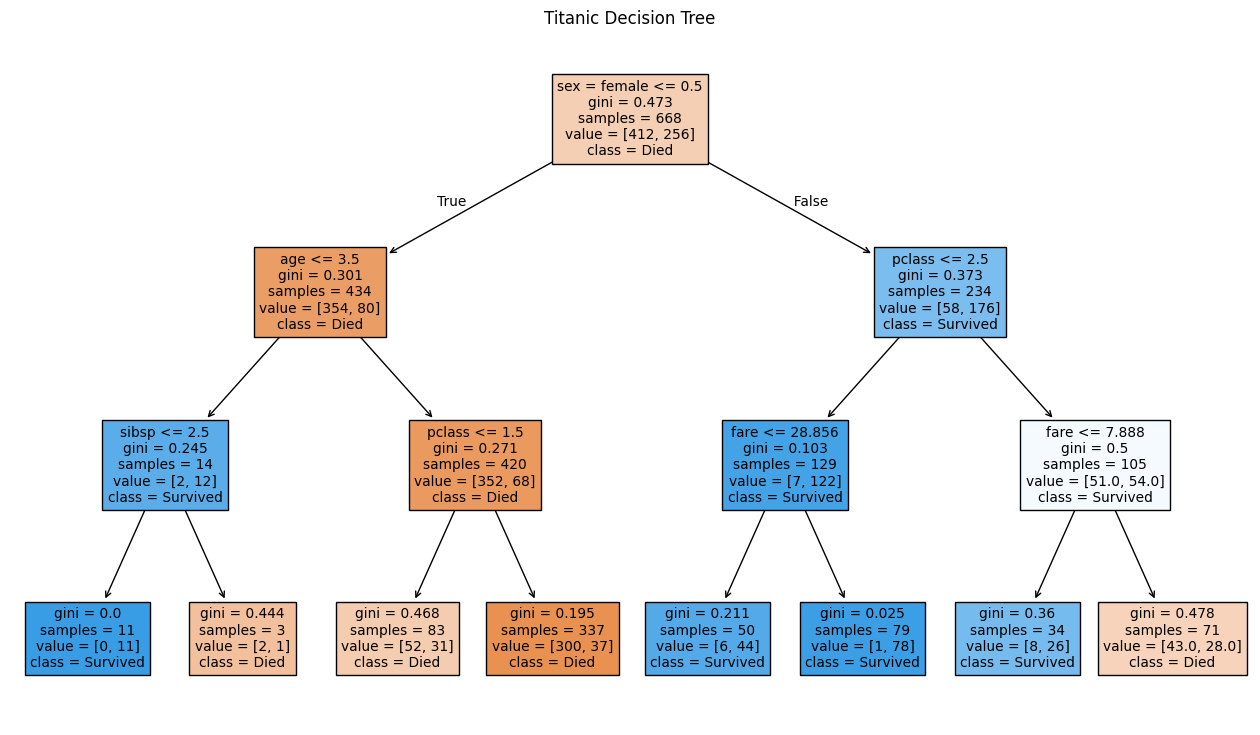

In [12]:

plt.figure(figsize=(16,9))
plot_tree(model, feature_names=X.columns, class_names=["Died","Survived"], filled=True)
plt.title("Titanic Decision Tree")
plt. show()
#note - true branch means sex IS NOT female <= 0.5 means 0
#total samples are 668, and for this number of samples in the root it shows that 412 are 0 for the class or died, 256 are 1 or survived
#so majority at the root node are died, or 0, and the class is slightly imbalanced

## 1️⃣1️⃣ Print readable IF‑THEN rules
This is another format to help understand model decisions.

In [14]:

print(export_text(model, feature_names=list(X.columns)))


|--- sex = female <= 0.50
|   |--- age <= 3.50
|   |   |--- sibsp <= 2.50
|   |   |   |--- class: 1
|   |   |--- sibsp >  2.50
|   |   |   |--- class: 0
|   |--- age >  3.50
|   |   |--- pclass <= 1.50
|   |   |   |--- class: 0
|   |   |--- pclass >  1.50
|   |   |   |--- class: 0
|--- sex = female >  0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 28.86
|   |   |   |--- class: 1
|   |   |--- fare >  28.86
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- fare <= 7.89
|   |   |   |--- class: 1
|   |   |--- fare >  7.89
|   |   |   |--- class: 0



---
## 🧠 How to interpret the tree
- The **top node** is the most important split.
- Each split asks a YES/NO question.
- Follow a path to a leaf to see the prediction.
- Lower Gini = purer node.

## You can try to improve the tree by changing some of the hyperparameters
- Change `max_depth` to 2 or 5
- Try `criterion='entropy'`
- Remove `fare` and retrain

## Summary
> Decision trees split data by asking simple yes/no questions that lead to a prediction.
